Name: Stefan Senjaya

NIM: 2440010441

Class: LA02

In [218]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, classification_report, confusion_matrix, f1_score, accuracy_score

<h4>1a. Explain the dataset profile comprehensively. Use visualization to help
the explanation.

Reading the dataset

In [219]:
marketingData = pd.read_csv("https://raw.githubusercontent.com/Styfh/MachineLearningCourse/main/CustomerMarketingDataset.csv")
print(marketingData.head)

<bound method NDFrame.head of         Age  Gender OwnHome  Married Location  Salary  Children History  \
0     Young    Male    Rent   Single    Close   15000         3     Low   
1     Young    Male    Rent   Single    Close   13000         3     Low   
2     Young  Female    Rent   Single    Close   14600         3     Low   
3     Young  Female    Rent   Single    Close   17900         3     Low   
4       Old  Female     Own   Single    Close   12700         2     Low   
..      ...     ...     ...      ...      ...     ...       ...     ...   
995  Middle  Female     Own  Married      Far   99200         0    High   
996     Old  Female     Own  Married      Far  110000         0    High   
997  Middle  Female    Rent  Married      Far  120800         1    High   
998  Middle    Male     Own  Married      Far  123000         1    High   
999     Old    Male     Own  Married      Far  112900         0    High   

     Catalogs AmountSpent  
0           6         Low  
1           6

Dataset datatypes:

In [220]:
print(marketingData.dtypes)

Age            object
Gender         object
OwnHome        object
Married        object
Location       object
Salary          int64
Children        int64
History        object
Catalogs        int64
AmountSpent    object
dtype: object


Dataset null values:

In [221]:
print(marketingData.isna().values.any())

print(marketingData.info())

True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   int64 
 7   History      697 non-null    object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB
None


Identifying categories in string data

In [222]:
print("Age")
age = marketingData[["Age"]].to_numpy()
print(np.unique(age))

print("Gender")
gender = marketingData[["Gender"]].to_numpy()
print(np.unique(gender))

print("OwnHome")
ownHome = marketingData[["OwnHome"]].to_numpy()
print(np.unique(ownHome))

print("Married")
married = marketingData[["Married"]].to_numpy()
print(np.unique(married))

print("Location")
location = marketingData[["Location"]].to_numpy()
print(np.unique(location))

# this column has null values as indicated when calling .info()
print("History")
history = marketingData[["History"]].dropna().to_numpy()
print(np.unique(history))

print("AmountSpent")
amountSpent = marketingData[["AmountSpent"]].to_numpy()
print(np.unique(amountSpent))

Age
['Middle' 'Old' 'Young']
Gender
['Female' 'Male']
OwnHome
['Own' 'Rent']
Married
['Married' 'Single']
Location
['Close' 'Far']
History
['High' 'Low' 'Medium']
AmountSpent
['High' 'Low' 'Medium' 'Very High']


Before continuing with the data profiling, I will preprocess the categorical data and handle the null values so that these can be visualized properly

Handling null values in the history column

Since a significant portion of the data has null history (303),
the data shouldn't be simply dropped. I'll assume having null history means the 
object simply never purchased from the Bee Department Store and will create category none signified by 0.

In [223]:
marketingData["History"] = marketingData["History"].fillna(0)

print(marketingData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   int64 
 7   History      1000 non-null   object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB
None


Handling categorical data

In [224]:
categorizedMarketingData = marketingData

ageMap = {
    "Young": 0,
    "Middle": 1,
    "Old": 2
}

genderMap = {
    "Male": 0,
    "Female": 1
}

ownHomeMap = {
    "Own": 0,
    "Rent": 1
}

marriedMap = {
    "Single": 0,
    "Married": 1
}

locationMap = {
    "Close": 0,
    "Far": 1
}

# 0 Already exist as NA category
historyMap = {
    "Low": 1,
    "Medium": 2,
    "High": 3
}

amountSpentMap = {
    "Low": 0,
    "Medium": 1,
    "High": 2,
    "Very High": 3
}

categorizedMarketingData["Age"] = marketingData["Age"].replace(ageMap)
categorizedMarketingData["Gender"] = marketingData["Gender"].replace(genderMap)
categorizedMarketingData["OwnHome"] = marketingData["OwnHome"].replace(ownHomeMap)
categorizedMarketingData["Married"] = marketingData["Married"].replace(marriedMap)
categorizedMarketingData["Location"] = marketingData["Location"].replace(locationMap)
categorizedMarketingData["History"] = marketingData["History"].replace(historyMap)
categorizedMarketingData["AmountSpent"] = marketingData["AmountSpent"].replace(amountSpentMap)

print(categorizedMarketingData.head)
print(categorizedMarketingData.info())

<bound method NDFrame.head of      Age  Gender  OwnHome  Married  Location  Salary  Children  History  \
0      0       0        1        0         0   15000         3        1   
1      0       0        1        0         0   13000         3        1   
2      0       1        1        0         0   14600         3        1   
3      0       1        1        0         0   17900         3        1   
4      2       1        0        0         0   12700         2        1   
..   ...     ...      ...      ...       ...     ...       ...      ...   
995    1       1        0        1         1   99200         0        3   
996    2       1        0        1         1  110000         0        3   
997    1       1        1        1         1  120800         1        3   
998    1       0        0        1         1  123000         1        3   
999    2       0        0        1         1  112900         0        3   

     Catalogs  AmountSpent  
0           6            0  
1          

Data Visualization

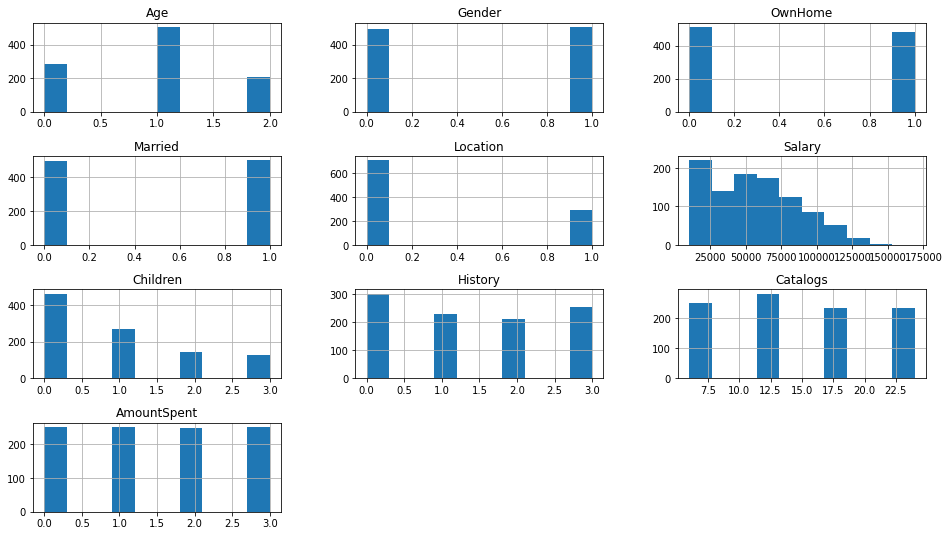

In [225]:
categorizedMarketingData.hist()
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

The data overall is distributed fairly evenly, but the only normally distributed data that is present is age so this will affect the algorithms that would optimally be used. It also has to be noted that the salary column has a significantly large range compared to the other columns.

<h4>1b. From the dataset profiling task (1.a.), please explain the relationship
between (1) the customer’s Age and their Salary; (2) the customer’s marital status and
their salary; (3) the customer’s salary and their amount spent in Bee Department
Store. Please explain it using data and visualization. 

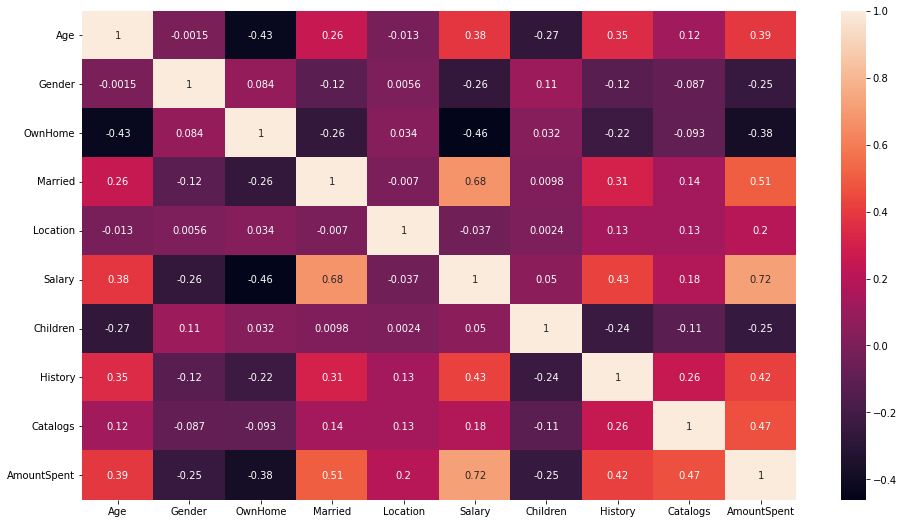

In [226]:
corr_matrix = categorizedMarketingData.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()

From the correlation matrix we can infer that:
1. The customer's age and salary has a positive correlation (0.38)
2. The customer's marital status and salary has a strong positive correlation (0.68)
3. The customer's has the strongest correlation and is positive (0.72)

<h4>1c. Perform data pre-processing and features engineering process on
the dataset! Please explain the motivation on why do you choose such data
processing and feature engineering techniques. Moreover, please explain the process
and the results.

I already performed the necessary pre-processing and feature engineering in the previous sections, so I'll review and break down what I used in this section. 

- <b>Handling of null data (data imputation)</b>

Our dataset contained null values in the history column. In the case file this column was described as "purchase volume history", so it was infered that having the column as null means the customer never made a purchase in the department store, because the category was sortable (low - high), a new category (0) was made and assigned in place of the null value. Results can be viewed in the handling null values section in 1a.

- <b>Handling categorical data (categorical imputation)</b>

The dataset contains a lot of columns that are categorical in nature, so we need to change them into integer values so the machine learning models can process the information. Several methods can be applied such as vectorization or encoding. The categorical data was simple in nature so I applied Ordinal Encoding manually, that is replacing each label with a set integer value. The results can be viewed in the handling categorical data section of 1a. 

If using distance based algorithms, a data with large distances and variances might take a lot longer to process, therefore feature scaling is necessary, one such column is the salary column. This column is an outlier in the entire datase ranging from thousands to tenths of thousands.

In this approach, we look back to the histogram and see that the distribution of the salary column is not shaped in a bell curve, meaning it is not normally distributed, as standardization utilizes the z-score it is not very ideal for non-normally distributed data, as such I decided to use MinMaxScaler or normalization instead.

<b> Feature scaling (Normalization)

Importing required libary

In [227]:
from sklearn.preprocessing import MinMaxScaler

Scaling the column

In [228]:
scaler = MinMaxScaler()

categorizedMarketingData["Salary"] = scaler.fit_transform(categorizedMarketingData[["Salary"]])

categorizedMarketingData.describe()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.918000,0.506000,0.484000,0.502000,0.290000,0.289880,0.93400,1.419000,14.682000,1.499000
std,0.696966,0.500214,0.499994,0.500246,0.453989,0.192919,1.05107,1.166533,6.622895,1.118593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.125236,0.00000,0.000000,6.000000,0.750000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.274732,1.00000,1.000000,12.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.421708,2.00000,3.000000,18.000000,2.250000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.00000,3.000000,24.000000,3.000000


<h3>1d. Perform feature selection and prepare your data correctly for the
machine learning training process. Please explain why do you choose the features and explain the process.

<b>Importing additional required libraries

In [229]:
import itertools

<b>Performing feature subset selection

Based on implementation in: https://github.com/andrychowanda/COMP6577/blob/master/COMP6577-5.ipynb

There are several common variables that might be built a prediction model around, I'll assume the model will be predicting the `AmountSpent` column.

In [230]:
# amount spent
x = categorizedMarketingData[["Age", "Gender", "OwnHome", "Married", "Location", "Children", "History", "Catalogs", "Salary"]]
y = categorizedMarketingData["AmountSpent"]

In [231]:
k = x.shape[1]
RSS, R2, features = [],[],[]
n = []

for k in range(1,len(x.columns) + 1):
    for i in itertools.combinations(x.columns, k):  
        LRG = linear_model.LinearRegression().fit(x[list(i)], y)
        RSS.append(mean_squared_error(y, LRG.predict(x[list(i)])) * len(y))
        R2.append(r2_score(y, LRG.predict(x[list(i)])))
        features.append(i)
        n.append(len(i))   

subset = pd.DataFrame({'n': n,'RSS': RSS, 'R2':R2,'features': features})

subset['Min_RSS'] = subset.groupby('n')['RSS'].transform(min)
subset['Max_R2'] = subset.groupby('n')['R2'].transform(max)
print(subset)

     n          RSS        R2  \
0    1  1057.148287  0.154281   
1    1  1173.265598  0.061387   
2    1  1072.549347  0.141960   
3    1   926.228268  0.259017   
4    1  1200.170617  0.039863   
..  ..          ...       ...   
506  8   335.141951  0.731886   
507  8   335.686044  0.731451   
508  8   335.420730  0.731663   
509  8   335.753207  0.731397   
510  9   334.602345  0.732318   

                                              features     Min_RSS    Max_R2  
0                                               (Age,)  607.028252  0.514377  
1                                            (Gender,)  607.028252  0.514377  
2                                           (OwnHome,)  607.028252  0.514377  
3                                           (Married,)  607.028252  0.514377  
4                                          (Location,)  607.028252  0.514377  
..                                                 ...         ...       ...  
506  (Age, Gender, OwnHome, Location, Children, Hi

In [232]:
Max_R2 = subset['R2'].max()
Min_RSS = subset['RSS'].min()
print("Max R2  : ", Max_R2)
print("Min RSS : ", Min_RSS)
index_R2 = subset['R2'].idxmax()
index_RSS = subset['RSS'].idxmin()
print (subset['features'][index_R2])
print (subset['features'][index_RSS])

Max R2  :  0.7323179101902855
Min RSS :  334.60234458005334
('Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Children', 'History', 'Catalogs', 'Salary')
('Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Children', 'History', 'Catalogs', 'Salary')


After running the code, we can see that all the columns should be included, this is supported by the correlation matrix when looking at the correlation for both variables each column has a notable impact with the weakest being 0.05 for the correlation between Salary and Children

<b>Splitting data

Importing required library

In [233]:
from sklearn.model_selection import train_test_split

Performing split

In [234]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2)

<h4> 2a. Choose at least three machine learning algorithms of your choice to
predict the customer amount spent at the Bee Department Store (AmountSpent).
Please explain your choice, the training process, and the training results.

<b>Problem:</b>

Predicting `AmountSpent`, a categorical variable, in other words <b>Classification</b>

<b>Algorithms of choice:</b>
1. Random Forest
2. K-Nearest Neighbours
3. SVM

<b>Reason to choose:</b>

All three are popular machine algorithms that differs fundamentally in the way they work, random forest being rule-based, to be more precise on decision trees, k-Nearest Neighbors being based on the distance between variables acts as the simplest option and SVM being based on support vector machines that is the boundaries between variables in a hyperplane.

<b>Random Forest<b>

Importing required libraries

In [235]:
from sklearn.ensemble import RandomForestClassifier

Training the model

In [236]:
rf = RandomForestClassifier(max_depth = 3)
rf.fit(xTrain, yTrain)

RandomForestClassifier(max_depth=3)

Running the model

In [237]:
rfRes = rf.predict(xTest)

for i in range(len(xTest)):
  print(xTest.values[i], rfRes[i])

[1.         1.         0.         1.         0.         2.
 2.         6.         0.41965974] 1
[2.         1.         1.         1.         0.         0.
 2.         6.         0.23188406] 1
[2.         1.         0.         0.         0.         0.
 0.         6.         0.00819156] 0
[0.         1.         1.         0.         1.         1.
 1.         6.         0.02709515] 0
[0.         1.         1.         0.         0.         2.
 0.         6.         0.07309389] 0
[ 0.         1.         1.         0.         0.         1.
  0.        12.         0.0447385] 0
[0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
 3.0000000e+00 0.0000000e+00 1.2000000e+01 8.1915564e-03] 0
[ 0.          0.          1.          0.          0.          1.
  0.         24.          0.02583491] 0
[ 0.          1.          0.          0.          0.          2.
  1.         24.          0.10712035] 0
[ 0.          1.          1.          1.          1.          0.
  2.         12. 

Evaluating the model

In [238]:
print("Accuracy: ", accuracy_score(yTest, rfRes))
print("MAE: ", mean_absolute_error(yTest, rfRes))
print("MSE: ", mean_squared_error(yTest, rfRes))
print("F1_Score: ", f1_score(yTest, rfRes, average='weighted'))
print(classification_report(yTest, rfRes))
print(confusion_matrix(yTest, rfRes, labels=[0,1]))

Accuracy:  0.63
MAE:  0.38
MSE:  0.4
F1_Score:  0.5984280035120239
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        44
           1       0.45      0.65      0.54        46
           2       0.64      0.23      0.34        61
           3       0.69      0.92      0.79        49

    accuracy                           0.63       200
   macro avg       0.64      0.66      0.62       200
weighted avg       0.64      0.63      0.60       200

[[37  7]
 [10 30]]


<b>K-Nearest Neighbors</b>

Importing required libraries

In [239]:
from sklearn.neighbors import KNeighborsClassifier

Training the model

In [240]:
knc = KNeighborsClassifier(n_neighbors = 3)
knc.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=3)

Running the model

In [241]:
kncRes = knc.predict(xTest)

for i in range(len(xTest)):
  print(xTest.values[i], kncRes[i])

[1.         1.         0.         1.         0.         2.
 2.         6.         0.41965974] 1
[2.         1.         1.         1.         0.         0.
 2.         6.         0.23188406] 1
[2.         1.         0.         0.         0.         0.
 0.         6.         0.00819156] 0
[0.         1.         1.         0.         1.         1.
 1.         6.         0.02709515] 0
[0.         1.         1.         0.         0.         2.
 0.         6.         0.07309389] 0
[ 0.         1.         1.         0.         0.         1.
  0.        12.         0.0447385] 0
[0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
 3.0000000e+00 0.0000000e+00 1.2000000e+01 8.1915564e-03] 0
[ 0.          0.          1.          0.          0.          1.
  0.         24.          0.02583491] 1
[ 0.          1.          0.          0.          0.          2.
  1.         24.          0.10712035] 0
[ 0.          1.          1.          1.          1.          0.
  2.         12. 

Evaluating the model

In [242]:
print("Accuracy: ", accuracy_score(yTest, kncRes))
print("MAE: ", mean_absolute_error(yTest, kncRes))
print("MSE: ", mean_squared_error(yTest, kncRes))
print("F1_Score: ", f1_score(yTest, kncRes, average='weighted'))
print(classification_report(yTest, kncRes))
print(confusion_matrix(yTest, kncRes, labels=[0,1]))

Accuracy:  0.64
MAE:  0.4
MSE:  0.49
F1_Score:  0.6345276217989227
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        44
           1       0.49      0.52      0.51        46
           2       0.64      0.48      0.55        61
           3       0.78      0.80      0.79        49

    accuracy                           0.64       200
   macro avg       0.64      0.65      0.64       200
weighted avg       0.64      0.64      0.63       200

[[36  8]
 [14 24]]


<b>SVM

Importing required libraries

In [243]:
from sklearn import svm

Training the model

In [244]:
svmc = svm.SVC()
svmc.fit(xTrain, yTrain)

SVC()

Running the model

In [245]:
svmcRes = svmc.predict(xTest)

for i in range(len(xTest)):
  print(xTest.values[i], svmcRes[i])

[1.         1.         0.         1.         0.         2.
 2.         6.         0.41965974] 1
[2.         1.         1.         1.         0.         0.
 2.         6.         0.23188406] 1
[2.         1.         0.         0.         0.         0.
 0.         6.         0.00819156] 0
[0.         1.         1.         0.         1.         1.
 1.         6.         0.02709515] 0
[0.         1.         1.         0.         0.         2.
 0.         6.         0.07309389] 0
[ 0.         1.         1.         0.         0.         1.
  0.        12.         0.0447385] 0
[0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
 3.0000000e+00 0.0000000e+00 1.2000000e+01 8.1915564e-03] 0
[ 0.          0.          1.          0.          0.          1.
  0.         24.          0.02583491] 3
[ 0.          1.          0.          0.          0.          2.
  1.         24.          0.10712035] 3
[ 0.          1.          1.          1.          1.          0.
  2.         12. 

Evaluating the model

In [246]:
print("Accuracy: ", accuracy_score(yTest, svmcRes))
print("MAE: ", mean_absolute_error(yTest, svmcRes))
print("MSE: ", mean_squared_error(yTest, svmcRes))
print("F1_Score: ", f1_score(yTest, svmcRes, average='weighted'))
print(classification_report(yTest, svmcRes))
print(confusion_matrix(yTest, svmcRes, labels=[0,1]))

Accuracy:  0.505
MAE:  0.705
MSE:  1.165
F1_Score:  0.4440891422265586
              precision    recall  f1-score   support

           0       0.59      0.82      0.69        44
           1       0.49      0.43      0.46        46
           2       0.38      0.08      0.14        61
           3       0.47      0.82      0.60        49

    accuracy                           0.51       200
   macro avg       0.48      0.54      0.47       200
weighted avg       0.47      0.51      0.44       200

[[36  1]
 [12 20]]


Discussing the results overall

After running all of the selected algorithms, they did okay but not well enough to say they are passable with the highest reaching 64% accuracy, that being the kNN model, followed very closely by random forest reaching 63% accuracy, while svm classifier did the worst at 50% accuracy.

<h4>2b.  Perform hyper-parameters tuning to three machine learning
algorithms of your choice from case number 2.a. The task is to predict the customer
amount spent at the Bee Department Store (AmountSpent). Please explain your
motivation on why do you choose such hyper-parameters tunning techniques.
Moreover, please explain the process and the results. 

There are sevelar methods that can be used to tune hyperparameters some popular methods include: grid search, random search, bayesian optimization.

In this section I'll perform <b> grid search</b> as it is a simple yet methodical approach to hyperparameter tuning. 

<b>Importing required libraries

In [247]:
from sklearn.model_selection import GridSearchCV

<b>Hyperparamater tuning Random Forest

Declaring hyperparameters

In [248]:
nEstimators = [1, 3, 5, 10, 20, 50]
maxFeatures = ['auto', 'sqrt']
maxDepth = [5, 10, 15, 20, 25, 30]
minSamplesSplit = [2, 6, 10]
minSamplesLeaf = [1, 3, 4] 
bootstrap = [True, False] 

grid_rf = {
  'n_estimators': nEstimators,
  'max_features' : maxFeatures,
  'max_depth': maxDepth,
  'min_samples_split': minSamplesSplit,
  'min_samples_leaf': minSamplesLeaf,
  'bootstrap': bootstrap
}

Executing grid search

In [249]:
CV_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf)
CV_rf.fit(xTrain, yTrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [1, 3, 5, 10, 20, 50]})

Printing best parameters

In [250]:
print("Best parameters: ", CV_rf.best_params_)

Best parameters:  {'bootstrap': False, 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


Utilizing best parameters

Training the model

In [251]:
rfcTuned = RandomForestClassifier(n_estimators=50, min_samples_split =10, min_samples_leaf=4, max_features='sqrt', max_depth=25, bootstrap=False)
rfcTuned.fit(xTrain, yTrain)

RandomForestClassifier(bootstrap=False, max_depth=25, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50)

Running the model

In [252]:
rfcTunedRes = rfcTuned.predict(xTest)

for i in range(len(xTest)):
  print(xTest.values[i], rfcTunedRes[i])

[1.         1.         0.         1.         0.         2.
 2.         6.         0.41965974] 1
[2.         1.         1.         1.         0.         0.
 2.         6.         0.23188406] 1
[2.         1.         0.         0.         0.         0.
 0.         6.         0.00819156] 0
[0.         1.         1.         0.         1.         1.
 1.         6.         0.02709515] 0
[0.         1.         1.         0.         0.         2.
 0.         6.         0.07309389] 0
[ 0.         1.         1.         0.         0.         1.
  0.        12.         0.0447385] 0
[0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
 3.0000000e+00 0.0000000e+00 1.2000000e+01 8.1915564e-03] 0
[ 0.          0.          1.          0.          0.          1.
  0.         24.          0.02583491] 0
[ 0.          1.          0.          0.          0.          2.
  1.         24.          0.10712035] 0
[ 0.          1.          1.          1.          1.          0.
  2.         12. 

Evaluating the model

In [253]:
print("Accuracy: ", accuracy_score(yTest, rfcTunedRes))
print("MAE: ", mean_absolute_error(yTest, rfcTunedRes))
print("MSE: ", mean_squared_error(yTest, rfcTunedRes))
print("F1_Score: ", f1_score(yTest, rfcTunedRes, average='weighted'))
print(classification_report(yTest, rfcTunedRes))
print(confusion_matrix(yTest, rfcTunedRes, labels=[0,1]))

Accuracy:  0.755
MAE:  0.245
MSE:  0.245
F1_Score:  0.7477402685640012
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        44
           1       0.62      0.70      0.65        46
           2       0.77      0.54      0.63        61
           3       0.80      0.92      0.86        49

    accuracy                           0.76       200
   macro avg       0.76      0.77      0.76       200
weighted avg       0.76      0.76      0.75       200

[[41  3]
 [ 8 32]]


<b>Hyperparameter tuning K-Nearest Neighbors

Declaring hyperparameters

In [254]:
n_neighbors = [1, 2, 3, 5, 10, 20]
algorithm = ["auto", "ball_tree", "kd_tree", "brute"]

grid_knn = {
    "n_neighbors": n_neighbors,
    "algorithm": algorithm,
}

Executing grid search

In [255]:
CV_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid_knn)
CV_knn.fit(xTrain, yTrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 5, 10, 20]})

Printing best parameters

In [256]:
print("Best parameters: ", CV_knn.best_params_)

Best parameters:  {'algorithm': 'auto', 'n_neighbors': 1}


Utilizing best parameters

Training the model

In [257]:
knnTuned = KNeighborsClassifier(n_neighbors=1, algorithm="auto")
knnTuned.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=1)

Running the model

In [258]:
knnTunedRes = knnTuned.predict(xTest)

for i in range(len(xTest)):
  print(xTest.values[i], knnTunedRes[i])

[1.         1.         0.         1.         0.         2.
 2.         6.         0.41965974] 1
[2.         1.         1.         1.         0.         0.
 2.         6.         0.23188406] 1
[2.         1.         0.         0.         0.         0.
 0.         6.         0.00819156] 1
[0.         1.         1.         0.         1.         1.
 1.         6.         0.02709515] 0
[0.         1.         1.         0.         0.         2.
 0.         6.         0.07309389] 0
[ 0.         1.         1.         0.         0.         1.
  0.        12.         0.0447385] 0
[0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
 3.0000000e+00 0.0000000e+00 1.2000000e+01 8.1915564e-03] 0
[ 0.          0.          1.          0.          0.          1.
  0.         24.          0.02583491] 1
[ 0.          1.          0.          0.          0.          2.
  1.         24.          0.10712035] 0
[ 0.          1.          1.          1.          1.          0.
  2.         12. 

Evaluating the model

In [259]:
print("Accuracy: ", accuracy_score(yTest, knnTunedRes))
print("MAE: ", mean_absolute_error(yTest, knnTunedRes))
print("MSE: ", mean_squared_error(yTest, knnTunedRes))
print("F1_Score: ", f1_score(yTest, knnTunedRes, average='weighted'))
print(classification_report(yTest, knnTunedRes))
print(confusion_matrix(yTest, knnTunedRes, labels=[0,1]))

Accuracy:  0.64
MAE:  0.37
MSE:  0.39
F1_Score:  0.6395452485380116
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        44
           1       0.52      0.61      0.56        46
           2       0.58      0.51      0.54        61
           3       0.74      0.71      0.73        49

    accuracy                           0.64       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.64      0.64      0.64       200

[[34 10]
 [10 28]]


<b>Hyperparameter tuning SVM

Declaring hyperparameter

In [260]:
kernel = ["rbf", "sigmoid", "linear"]
gamma = [0.001, 0.01, 0.1, 1]
c = [0.1, 1, 10, 100]

grid_svc = {
    "kernel": kernel,
    "gamma": gamma,
    "C": c
}

Executing grid search

In [261]:
CV_svc = GridSearchCV(estimator=svm.SVC(), param_grid=grid_svc)
CV_svc.fit(xTrain, yTrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'sigmoid', 'linear']})

Printing best parameters

In [262]:
print("Best parameters: ", CV_svc.best_params_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


Training the model

In [263]:
svcTuned = svm.SVC(kernel="rbf", gamma=0.01, C=100)
svcTuned.fit(xTrain, yTrain)

SVC(C=100, gamma=0.01)

Running the model

In [264]:
svcTunedRes = svcTuned.predict(xTest)

for i in range(len(xTest)):
  print(xTest.values[i], svcTunedRes[i])

[1.         1.         0.         1.         0.         2.
 2.         6.         0.41965974] 1
[2.         1.         1.         1.         0.         0.
 2.         6.         0.23188406] 1
[2.         1.         0.         0.         0.         0.
 0.         6.         0.00819156] 0
[0.         1.         1.         0.         1.         1.
 1.         6.         0.02709515] 0
[0.         1.         1.         0.         0.         2.
 0.         6.         0.07309389] 0
[ 0.         1.         1.         0.         0.         1.
  0.        12.         0.0447385] 0
[0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
 3.0000000e+00 0.0000000e+00 1.2000000e+01 8.1915564e-03] 0
[ 0.          0.          1.          0.          0.          1.
  0.         24.          0.02583491] 1
[ 0.          1.          0.          0.          0.          2.
  1.         24.          0.10712035] 0
[ 0.          1.          1.          1.          1.          0.
  2.         12. 

Evaluating the model

In [265]:
print("Accuracy: ", accuracy_score(yTest, svcTunedRes))
print("MAE: ", mean_absolute_error(yTest, svcTunedRes))
print("MSE: ", mean_squared_error(yTest, svcTunedRes))
print("F1_Score: ", f1_score(yTest, svcTunedRes, average='weighted'))
print(classification_report(yTest, svcTunedRes))
print(confusion_matrix(yTest, svcTunedRes, labels=[0,1]))

Accuracy:  0.675
MAE:  0.33
MSE:  0.34
F1_Score:  0.6660439119290987
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        44
           1       0.54      0.57      0.55        46
           2       0.64      0.48      0.55        61
           3       0.75      0.84      0.79        49

    accuracy                           0.68       200
   macro avg       0.67      0.69      0.68       200
weighted avg       0.67      0.68      0.67       200

[[39  5]
 [12 26]]


After running all the algorithms this time performing hyperparameter tuning, the order shifted massively. The most accurate algorithm is now random forest at 75% accuracy (12% increase), followed by SVM classification which improved the most out of all the algorithms now stands at 67% accuracy (17.5% accuracy), lastly the previous best which is kNN now sits last having unchanged accuracy at 64%, that being said the absolute and squared mean error did see improvement (0.4 and 0.49) to (0.37 and 0.39) respectively.

<h4>2c. Evaluate all the models trained with the machine learning algorithms
from task no 2.b. Explain comprehensively: (1) the meaning of the results, (2) the
future work direction to improve the model (i.e. what should we do to improve the
results).


Therefore it can be concluded that the random forest regression model is the best model to apply out of the three that was chosen both before and after hyperparameter tuning. 

For future work, two things come to mind that can be tried in order to improve the results. Different algorithms often require different preprocessing techniques to be applied, for example in this work, only minmaxscaler, a type of normalization is applied, however other algorithms might benefit a lot more from standardization being applied.


The other suggestion is to experiment with other hyperparameter tuning algorithms, as mentioned in the beginning of the hyperparameter tuning section, Grid Search is a simplistic yet methodical technique where we the user define the possible values first, however other techniques don't require this and might yield better results for varying amount of computing power.


<h4>3a.Prepare your data for the clustering task. Perform data preprocessing and features engineering process on the dataset specifically for clustering
task! Please explain your motivation on why do you choose such data processing and
feature engineering techniques. Moreover, please explain the process and the results.

Clustering is a distance based task, this means that data should be scaled, but not only that the most popular clustering algorithm that is K-Means also creates an assumption that the data is normally distributed. However we have a lot of columns that are already categorical in nature as such K-Means is not ideal, and we have already done the feature scaling in the previous section. 

<h4> 3b. Choose at least two clustering algorithms of your choice to cluster
the customer. Please explain your choice, the training process, and the training
results. Moreover, perform hyper-parameters tuning to the best clustering
algorithms.

In [266]:
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

<b>DBScan

In [267]:
DBS = DBSCAN().fit(categorizedMarketingData)
YPredict = DBS.fit_predict(categorizedMarketingData)
DBSLabels = DBS.labels_
DBSCore = DBS.core_sample_indices_
print("DBS Labels : ", DBSLabels)
print("DBS Core Sample : ", DBSCore)
print("Y Predict : ", YPredict)
print("DBS: ", silhouette_score(categorizedMarketingData, YPredict))

DBS Labels :  [-1 -1 -1 -1 -1 -1 -1  0 -1 -1  1  0 -1 -1 -1 -1 -1 -1 -1  0  0  2 -1 -1
 -1 -1 -1 -1 -1 -1 -1  3 -1  4  5  3 -1 -1 -1  1 -1 -1 -1 -1 -1  0  0  0
  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1  4 -1  0 -1 -1 -1  0 -1 -1  0
 -1 -1 -1  0 -1  2 -1  5 -1 -1  4 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  0 -1 -1 -1 -1  4 -1 -1 -1 -1 -1 -1  2 -1  1 -1  3
 -1  6 -1  3 -1 -1  6 -1 -1 -1 -1  1 -1 -1  5  6 -1 -1 -1 -1 -1 -1 -1 -1
 -1  5 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1  6
 -1  6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  5  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  7 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  7 -1 -1 -1 -1 -1  8 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  7 -1 -1 -1 -1 -1 -1 

<b>Gaussian Mixture

In [268]:
GMM = GaussianMixture(n_components=5).fit(categorizedMarketingData)
YPredict = GMM.predict(categorizedMarketingData)
print("Y Predict : ", YPredict)
print("GMM: ", silhouette_score(categorizedMarketingData, YPredict))

Y Predict :  [3 3 3 3 3 3 1 3 3 3 3 3 1 1 3 3 3 3 3 3 3 1 1 3 3 3 3 3 1 3 3 2 1 3 3 2 1
 3 3 3 3 1 2 3 3 3 3 3 3 3 3 2 3 3 3 3 1 3 0 2 3 3 3 3 3 3 2 1 3 1 1 3 3 2
 3 3 1 1 3 3 3 2 3 3 0 1 1 1 1 2 2 3 1 3 3 1 3 3 3 3 0 0 3 3 3 3 3 3 3 3 3
 3 1 1 2 1 3 3 3 2 1 1 3 2 3 1 1 3 2 1 2 3 3 0 3 1 1 3 1 3 0 1 2 1 3 3 3 3
 1 1 3 0 1 1 1 3 1 1 1 1 2 0 1 3 3 2 1 3 3 0 3 1 0 3 2 1 0 1 1 3 1 1 2 1 2
 0 3 3 1 2 2 1 0 1 2 0 2 0 1 3 1 1 3 3 1 0 1 1 1 3 3 1 1 2 2 2 1 1 1 1 0 1
 3 2 3 2 1 1 3 0 3 3 1 1 2 1 3 0 1 1 3 1 1 2 3 3 1 3 0 3 3 3 3 1 3 3 2 0 1
 3 2 0 2 3 3 2 0 0 1 0 3 3 2 3 3 1 3 3 1 3 0 3 2 3 2 3 2 1 1 1 0 1 1 3 3 1
 3 0 1 0 1 1 1 0 2 1 1 4 1 2 2 1 2 1 1 3 1 3 3 2 1 1 1 1 3 1 1 3 3 2 3 0 3
 3 3 0 2 3 0 3 3 1 3 2 1 0 3 1 3 4 0 0 3 0 3 2 4 2 3 0 1 3 1 4 3 0 1 0 3 3
 1 3 3 3 4 3 3 3 0 1 3 4 3 0 3 3 3 4 0 1 3 4 4 3 1 3 1 2 3 2 2 4 3 3 3 3 1
 1 1 0 3 2 1 1 3 1 3 0 3 3 1 1 3 1 1 1 1 1 1 3 3 1 3 1 1 1 0 1 1 3 3 1 1 1
 3 4 1 2 3 2 4 1 3 1 4 3 2 1 4 1 1 3 3 0 3 1 4 0 1 4 0 4 2 0 0 4 1 2 0 0 3
 0 3 1 1 1 1

Since gaussian mixture achieved a higher silhouette score than db scan, I will move ahead to the next phase that is attempt to tune its hyperparameter using GridSearchCV as is the case in the previous section.

</b>Hyperparameter tuning Gaussian Mixture

Declaring hyperparameter

In [269]:
n_components = [2, 3, 5, 10, 15, 20, 25, 30, 50]

gm_grid = {
    "n_components": n_components
}

Executing grid search

In [270]:
CV_gm = GridSearchCV(GaussianMixture(), param_grid=gm_grid)
CV_gm.fit(categorizedMarketingData)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'n_components': [2, 3, 5, 10, 15, 20, 25, 30, 50]})

Printing best parameters

In [271]:
print(CV_gm.best_params_)

{'n_components': 15}


Utlizing best parameters

In [272]:
GMM = GaussianMixture(n_components=15).fit(categorizedMarketingData)
YPredict = GMM.predict(categorizedMarketingData)
print("Y Predict : ", YPredict)
print("GMM: ", silhouette_score(categorizedMarketingData, YPredict))

Y Predict :  [ 2  2  2  2  2  2 10  2  2  2 12  2  7  7  2  2  2  2  2  2  2  7  7 12
 12  2  2  2  7  2 12  3  1  2  2  3  1  2  2 12  2  7  3  2  2  2  2  2
  2 12  2  3  2 12 12  2  7  2  0  3 12  2  2 12  2  2  3  5  2  7 10  2
  2  3  2  2 10  7  2  2  2  3  2  2 14  7  7  5  5  3  3  2 10 12  2 10
  2  2  2  2 14 14 12  2  2  2  2 12  2 12  2  2  7  7  3  7  2 12  2  3
  5  7  2  3 12 10  7  2  3 10  3 12  2 14  2  7  1  2 10 12 14  5  3 10
  2  2 12  2  7  5 12 14  7  5  5  2  5  5 10  5  3 14  7  2  2  3 10  2
  2 13  2  5 14 12  3 10 13  7  7  2  5  7  3  7  3 14 12  2 10  3  3  7
 14  7  3 14  3 14  5  2  7 10  2 12  5 13  1  5  1  2 12  5  5  3  3  3
  5  5  1  5 14  1  2  8  2  3  1  5  2 14 12 12  5  7  3  5  2  0  5  5
  2  7 10  3  6  2  5  2 14  6  9  9  6  5 12  6  8 11  1  9  3 14  3 12
 12  3 13 14  7 13 12 12  3  9  9  1 12  9  7  9 13  6  3  9  8  9  3 10
  5 10 14  7  7  6  6  5  9 13  5 13  7  7 10  0  3  5  5  3 10  3  3 10
  8  5  7  9  7  9 12  3  7  7  7  1  

3c. Evaluate all the models trained with the machine learning algorithms
from task no 2.b. Explain comprehensively: (1) the meaning of the results, (2) the
future work direction to improve the model (i.e. what should we do to improve the
results).

Oddly enough the score of the "tuned" GMM is closer to 0 than the original assumed n_components of 5, this does make sense to an extent as silhouette score measures how much distance the clusters have between one another, with the presence of more clusters inevitably the distance between them will lessen as some would be split.  

In order to improve the model I would suggest to try out some other algorithms first. One such algorithm that might work better is k modes which reportedly handles categorical data rather well, other than that, transforming the data so that its distribution can be shaped normally and reapplying dbscan or alternatively trying the well performing k-means algorithm might also work.